# Customer Segmentation for Targeted Marketing Campaigns

## Objective
The goal of this project is to segment customers based on their purchasing behavior using **RFM analysis** and **machine learning techniques**. The insights will be used to develop targeted marketing strategies to improve customer engagement, retention, and revenue.

## Key Questions
- What are the distinct customer segments?
- What are the characteristics of each segment?
- How can the company tailor marketing campaigns for each segment?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = r"C:\Users\Lenovo\Desktop\New folder\OnlineRetail.xlsx"  
data = pd.read_excel(file_path)

## Data Exploration and Cleaning

### Dataset
The dataset used is the **Online Retail Dataset**, which contains transactional data for an online retail store. It includes the following columns:
- `InvoiceNo`: Unique identifier for each transaction.
- `StockCode`: Unique identifier for each product.
- `Description`: Description of the product.
- `Quantity`: Number of units purchased.
- `InvoiceDate`: Date and time of the transaction.
- `UnitPrice`: Price per unit of the product.
- `CustomerID`: Unique identifier for each customer.
- `Country`: Country where the transaction occurred.

### Data Cleaning Steps
1. **Handled Missing Values:**
   - Dropped rows with missing `CustomerID` (essential for customer-level analysis).
2. **Removed Canceled Orders:**
   - Filtered out transactions with negative `Quantity` or `UnitPrice` (indicating canceled orders or returns).
3. **Created New Features:**
   - Calculated `TotalSpend` as `Quantity * UnitPrice` for each transaction.

In [10]:
# Display the first few rows
print("First 5 rows of the dataset:")
data.head(5)

First 5 rows of the dataset:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [14]:
# Check basic info about the dataset
print("\nDataset info:")
data.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [15]:
# Check for missing values
print("\nMissing values in each column:")
data.isnull().sum()


Missing values in each column:


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [16]:
# Basic statistics for numerical columns
print("\nBasic statistics:")
data.describe()


Basic statistics:


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [3]:
# Drop rows with missing CustomerID
data = data.dropna(subset=['CustomerID'])

# Remove canceled orders (where Quantity is negative)
data = data[data['Quantity'] > 0]

# Remove rows with negative UnitPrice
data = data[data['UnitPrice'] > 0]

# Check the cleaned dataset
print("Cleaned dataset info:")
data.info()

print("\nMissing values after cleaning:")
data.isnull().sum()

Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB

Missing values after cleaning:


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [34]:
data['TotalSpend'] = data['Quantity'] * data['UnitPrice']
data['TotalSpend'].describe()


count    397884.000000
mean         22.397000
std         309.071041
min           0.001000
25%           4.680000
50%          11.800000
75%          19.800000
max      168469.600000
Name: TotalSpend, dtype: float64

## Exploratory Data Analysis (EDA)

### Key Insights
1. **Distribution of Customers by Country:**
   - The majority of transactions are from the **United Kingdom**, with smaller contributions from countries like Germany, France, and Ireland.
2. **Top 10 Most Popular Products:**
   - Products like **WHITE HANGING HEART T-LIGHT HOLDER** and **REGENCY CAKESTAND 3 TIER** are the most popular.
3. **Distribution of Total Spend:**
   - Most transactions fall in the **$0–$200** range, with a peak around **$0–$50**.

### Visualizations
- Bar charts for customer distribution by country.
- Histograms for total spend and purchase frequency.

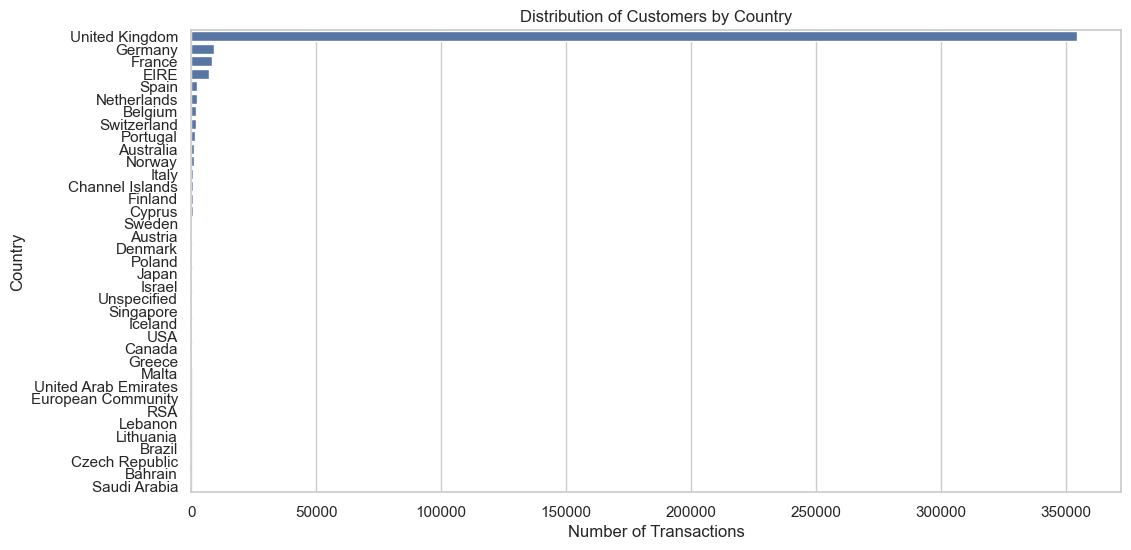

In [7]:
# Set up visualizations
sns.set_theme(style="whitegrid")

# Distribution of customers by country
plt.figure(figsize=(12, 6))
sns.countplot(y='Country', data=data, order=data['Country'].value_counts().index)
plt.title("Distribution of Customers by Country")
plt.xlabel("Number of Transactions")
plt.ylabel("Country")
plt.show()

Top 10 most popular products:
Description
WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1723
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1396
LUNCH BAG RED RETROSPOT               1316
SET OF 3 CAKE TINS PANTRY DESIGN      1159
LUNCH BAG  BLACK SKULL.               1105
POSTAGE                               1099
PACK OF 72 RETROSPOT CAKE CASES       1068
Name: count, dtype: int64


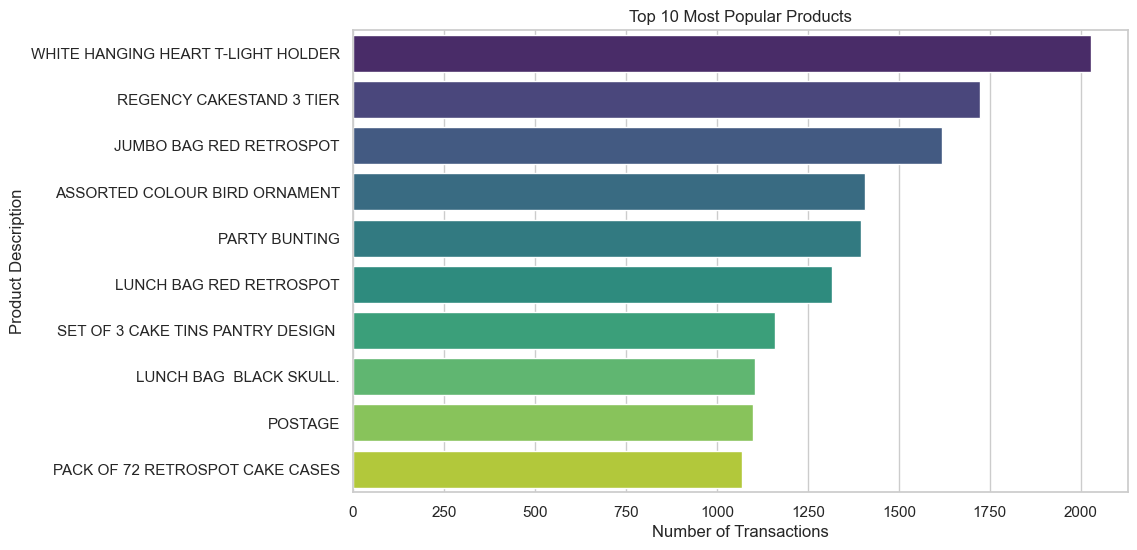

In [37]:
# Top 10 most popular products
top_products = data['Description'].value_counts().head(10)
print("Top 10 most popular products:")
print(top_products)

# Visualize top products
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, palette="viridis",  legend=False)
plt.title("Top 10 Most Popular Products")
plt.xlabel("Number of Transactions")
plt.ylabel("Product Description")
plt.show()

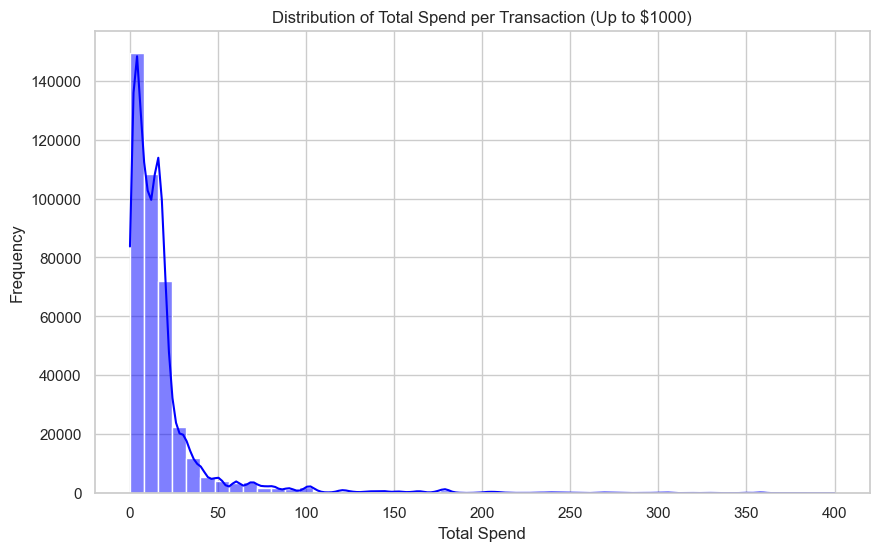

In [35]:
# Set up visualizations
sns.set_theme(style="whitegrid")

# Filter out extreme outliers (e.g., TotalSpend > 400)
filtered_data = data[data['TotalSpend'] <= 400]

# Distribution of TotalSpend
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['TotalSpend'], bins=50, kde=True, color='blue')
plt.title("Distribution of Total Spend per Transaction (Up to $1000)")
plt.xlabel("Total Spend")
plt.ylabel("Frequency")
plt.show()

## Customer Segmentation

### RFM Analysis
Customers were segmented based on:
- **Recency (R):** How recently a customer made a purchase.
- **Frequency (F):** How often they purchase.
- **Monetary (M):** How much they spend.

### Machine Learning for Segmentation
- Applied **K-Means clustering** to group customers into segments based on RFM metrics.
- Identified key segments such as **Champions**, **Loyal Customers**, **Potential Loyalists**, and **At Risk**.

### Segment Characteristics
- **Champions:** Recent, frequent, and high-spending customers.
- **At Risk:** Customers who were valuable but haven’t made recent purchases.
- **Potential Loyalists:** Customers with moderate recency, frequency, and high spend.

In [6]:
from datetime import timedelta

In [7]:
# Calculate Recency, Frequency, and Monetary values
# Recency: Number of days since the last purchase
# Frequency: Number of purchases
# Monetary: Total spend

# Convert InvoiceDate to datetime (if not already done)
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Calculate Recency
latest_date = data['InvoiceDate'].max() + timedelta(days=1)
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalSpend': 'sum'  # Monetary
})

# Rename columns
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalSpend': 'Monetary'
}, inplace=True)

# Display RFM table
print("RFM Table:")
rfm.head()

RFM Table:


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


In [36]:
# Function to calculate RFM scores with dynamic labels
def calculate_rfm_scores(column, num_bins=5):
    try:
        # Calculate quantiles and assign scores
        labels = list(range(num_bins, 0, -1))  # Labels in descending order (5 is best)
        return pd.qcut(column, q=num_bins, labels=labels, duplicates='drop')
    except ValueError:
        # If there are not enough unique values, assign the same score
        return pd.Series([num_bins] * len(column), index=column.index)

# Create RFM scores (1–5, where 5 is the best)
rfm['RecencyScore'] = calculate_rfm_scores(rfm['Recency'], num_bins=5)
rfm['FrequencyScore'] = calculate_rfm_scores(rfm['Frequency'], num_bins=5)
rfm['MonetaryScore'] = calculate_rfm_scores(rfm['Monetary'], num_bins=5)

# Combine scores into a single RFM score
rfm['RFM_Score'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str) + rfm['MonetaryScore'].astype(str)

# Create segments based on RFM scores
segment_map = {
    r'[4-5][4-5][4-5]': 'Champions',
    r'[3-5][3-5][3-5]': 'Loyal Customers',
    r'[2-5][2-5][2-5]': 'Potential Loyalists',
    r'[3-5][1-3][1-3]': 'Recent Customers',
    r'[2-5][1-2][1-2]': 'Promising',
    r'[1-2][4-5][4-5]': 'At Risk',
    r'[1-2][1-3][1-3]': 'Hibernating',
    r'[1-2][1-2][1-2]': 'Lost'
}

rfm['Segment'] = rfm['RFM_Score'].replace(segment_map, regex=True)

# Display the segmented RFM table
print("Segmented RFM Table:")
rfm.head(10)

Segmented RFM Table:


,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Segment,Cluster,Churn,CLV
CustomerID,,,,,,,,,,,
12346.0,326,1,77183.60,1,5,1,151,151,3,1,86417.220859
12347.0,2,7,4310.00,5,5,1,551,551,0,0,786575.000000
12348.0,75,4,1797.24,2,5,2,252,Potential Loyalists,0,0,8746.568000
12349.0,19,1,1757.55,4,5,2,452,Potential Loyalists,0,0,33763.460526
12350.0,310,1,334.40,1,5,4,154,At Risk,1,1,393.729032
12352.0,36,8,2506.04,3,5,1,351,351,0,0,25408.461111
12353.0,204,1,89.00,1,5,5,155,At Risk,1,1,159.240196
12354.0,232,1,1079.40,1,5,2,152,152,1,1,1698.193966
12355.0,214,1,459.40,1,5,4,154,At Risk,1,1,783.556075


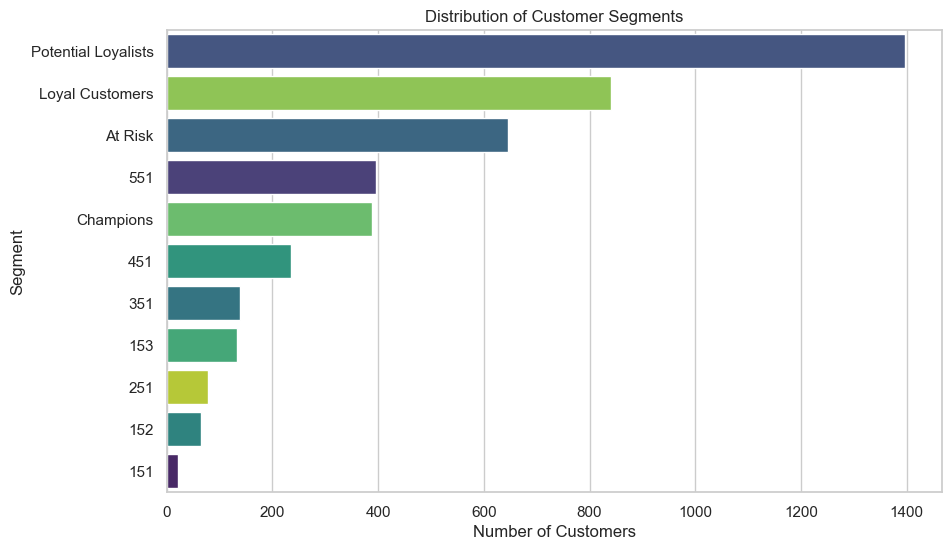

In [41]:
# Set up visualizations
sns.set_style(style="whitegrid")

# Plot the distribution of customer segments
plt.figure(figsize=(10, 6))
sns.countplot(y='Segment', hue='Segment', data=rfm, order=rfm['Segment'].value_counts().index, palette='viridis', legend=False)
plt.title("Distribution of Customer Segments")
plt.xlabel("Number of Customers")
plt.ylabel("Segment")
plt.show()

In [9]:
# Calculate average RFM metrics for each segment
segment_analysis = rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

# Display the segment analysis
print("Segment Analysis:")
segment_analysis

Segment Analysis:


,Segment,Recency,Frequency,Monetary
0,151,255.952381,5.238095,10924.143857
1,152,244.400000,2.400000,1341.158308
2,153,253.954887,1.977444,666.264135
3,251,106.844156,5.480519,3589.073896
4,351,50.877698,6.884892,4418.287842
5,451,22.906383,9.246809,5522.718426
6,551,5.646465,16.520202,10686.088157
7,At Risk,274.465944,1.208978,238.132957
8,Champions,17.430412,1.639175,273.511057
9,Loyal Customers,39.593341,2.266350,528.194103


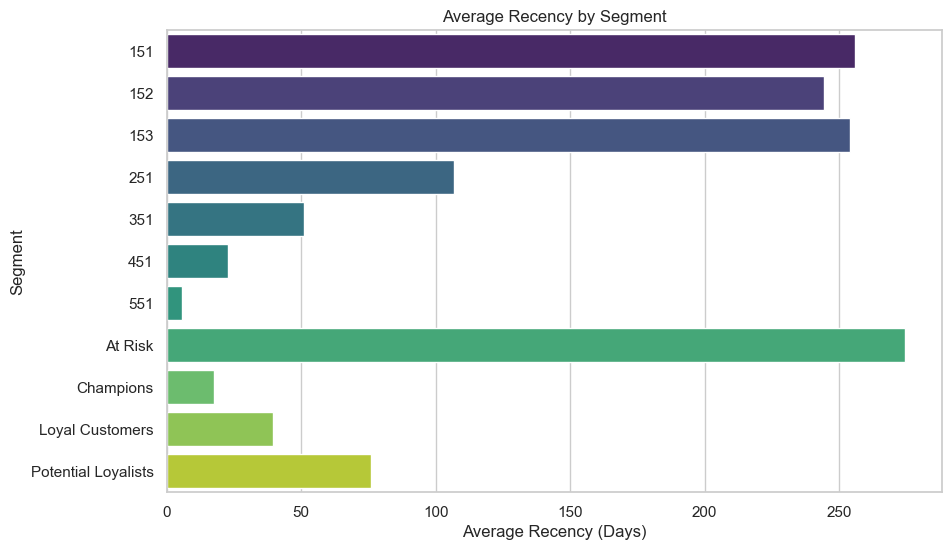

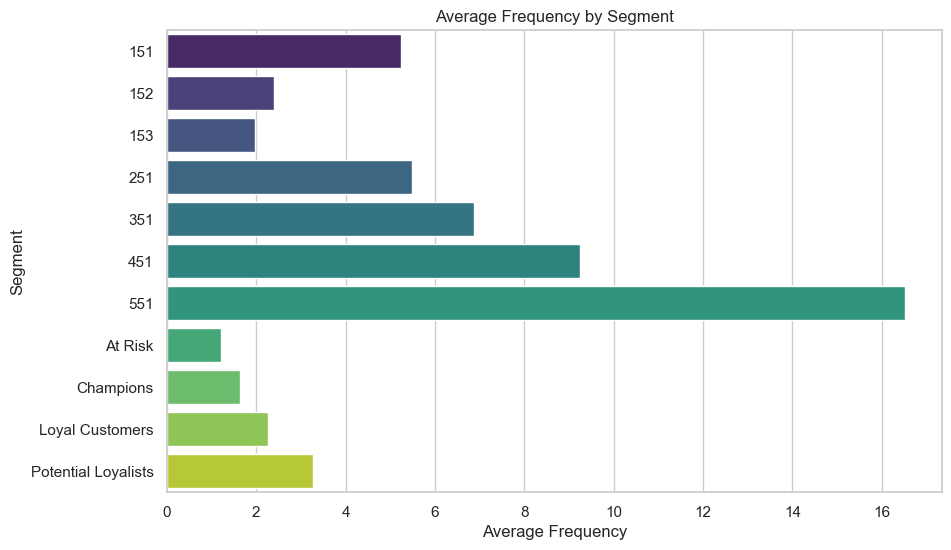

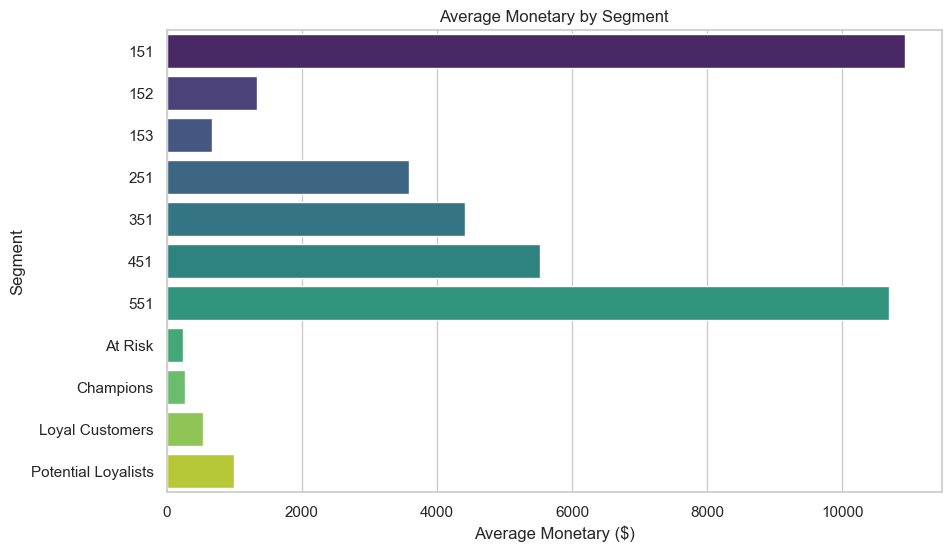

In [44]:
# Set up visualizations
sns.set_style(style="whitegrid")

# Plot average Recency by segment
plt.figure(figsize=(10, 6))
sns.barplot(x='Recency', y='Segment', hue='Segment', data=segment_analysis, palette='viridis', legend=False)
plt.title("Average Recency by Segment")
plt.xlabel("Average Recency (Days)")
plt.ylabel("Segment")
plt.show()

# Plot average Frequency by segment
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Segment', hue='Segment', data=segment_analysis, palette='viridis', legend=False)
plt.title("Average Frequency by Segment")
plt.xlabel("Average Frequency")
plt.ylabel("Segment")
plt.show()

# Plot average Monetary by segment
plt.figure(figsize=(10, 6))
sns.barplot(x='Monetary', y='Segment', hue='Segment', data=segment_analysis, palette='viridis', legend=False)
plt.title("Average Monetary by Segment")
plt.xlabel("Average Monetary ($)")
plt.ylabel("Segment")
plt.show()

In [18]:
# Export the RFM table with segments to a CSV file
rfm.to_csv("customer_segments.csv", index=True)

print("Customer segments exported to 'customer_segments.csv'")

Customer segments exported to 'customer_segments.csv'


In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [25]:
# Standardize the RFM data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Analyze cluster characteristics
cluster_analysis = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()
cluster_analysis

,Cluster,Recency,Frequency,Monetary
0,0,43.808170,3.686928,1358.774086
1,1,248.469426,1.553151,480.423604
2,2,1.500000,135.833333,58381.123333
3,3,15.724138,22.300493,13533.997044
4,4,7.666667,42.833333,190863.461667


## Predictive Modeling

### Churn Prediction
- Built a **Random Forest model** to predict customer churn based on RFM metrics.
- Used **SHAP values** to interpret the model and identify the most important features.

### Key Insights
- **Recency** and **Frequency** are the most important factors in predicting churn.
- Customers with low recency and frequency scores are at the highest risk of churn.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [15]:
# Create a target variable (e.g., churn if Recency > 90 days)
rfm['Churn'] = rfm['Recency'].apply(lambda x: 1 if x > 90 else 0)

# Split data into training and testing sets
X = rfm[['Recency', 'Frequency', 'Monetary']]
y = rfm['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       865
           1       1.00      1.00      1.00       437

    accuracy                           1.00      1302
   macro avg       1.00      1.00      1.00      1302
weighted avg       1.00      1.00      1.00      1302



## Customer Lifetime Value (CLV)

### Calculation
- Calculated CLV for each customer using the formula:  
  **CLV = (Average Purchase Value × Purchase Frequency × Customer Lifespan)**

### Segment-Level CLV
- **551 Segment:** Highest CLV due to high spend and frequency.
- **At Risk Segment:** Lowest CLV due to low spend and infrequent purchases.

### Business Impact
- Focus marketing efforts on high-CLV segments to maximize ROI.

In [14]:
# Calculate CLV for each segment
rfm['CLV'] = (rfm['Monetary'] / rfm['Frequency']) * rfm['Frequency'] * (365 / rfm['Recency'])
segment_clv = rfm.groupby('Segment')['CLV'].mean().reset_index()
segment_clv

,Segment,CLV
0,151,1.595767e+04
1,152,2.075930e+03
2,153,9.968667e+02
3,251,1.322804e+04
4,351,3.467001e+04
5,451,9.514706e+04
6,551,1.765910e+06
7,At Risk,3.337920e+02
8,Champions,1.087032e+04
9,Loyal Customers,1.352072e+04


## Actionable Recommendations

### Marketing Strategies by Segment
1. **Champions:**
   - Retain with exclusive perks (e.g., free shipping, early access to new products).
2. **Potential Loyalists:**
   - Encourage repeat purchases with personalized offers and loyalty rewards.
3. **At Risk:**
   - Re-engage with win-back campaigns (e.g., discounts, personalized messages).
4. **Loyal Customers:**
   - Reward with exclusive perks and ask for feedback to improve their experience.

### Business Impact
- By targeting high-value segments and re-engaging at-risk customers, the company can increase revenue and reduce churn.

## Conclusion

### Summary
This project successfully segmented customers using **RFM analysis** and **machine learning techniques**. The insights were used to develop targeted marketing strategies that can improve customer engagement, retention, and revenue.

### Next Steps
1. Implement the proposed marketing campaigns.
2. Monitor performance and refine strategies based on results.
3. Expand the analysis to include additional data (e.g., demographics, website behavior).

## Appendix

### Tools and Technologies
- **Programming Languages:** Python
- **Libraries:** Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn, Plotly

### Dataset Source
- [Online Retail Dataset](https://archive.ics.uci.edu/ml/datasets/Online+Retail)

### Code Repository
- [GitHub Link](https://github.com/Solini82) 